In [26]:
import evaluate

In [2]:
evaluate.list_evaluation_modules(with_details=True)

[{'name': 'lvwerra/test', 'type': 'metric', 'community': True, 'likes': 0},
 {'name': 'angelina-wang/directional_bias_amplification',
  'type': 'metric',
  'community': True,
  'likes': 6},
 {'name': 'cpllab/syntaxgym', 'type': 'metric', 'community': True, 'likes': 1},
 {'name': 'lvwerra/bary_score',
  'type': 'metric',
  'community': True,
  'likes': 1},
 {'name': 'hack/test_metric', 'type': 'metric', 'community': True, 'likes': 0},
 {'name': 'yzha/ctc_eval', 'type': 'metric', 'community': True, 'likes': 1},
 {'name': 'codeparrot/apps_metric',
  'type': 'metric',
  'community': True,
  'likes': 7},
 {'name': 'mfumanelli/geometric_mean',
  'type': 'metric',
  'community': True,
  'likes': 1},
 {'name': 'daiyizheng/valid', 'type': 'metric', 'community': True, 'likes': 0},
 {'name': 'erntkn/dice_coefficient',
  'type': 'metric',
  'community': True,
  'likes': 0},
 {'name': 'mgfrantz/roc_auc_macro',
  'type': 'metric',
  'community': True,
  'likes': 0},
 {'name': 'Vlasta/pr_auc', 'type'

In [3]:
#加载评估函数
accuracy = evaluate.load("accuracy")

In [4]:
print(accuracy.description)
print(accuracy.inputs_description)


Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative


Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2,

Example 1-A simple example

        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0]) `输出正确的比例`
        >>> print(results)
        {'accuracy': 0.5}   

Example 2-The same as Example 1, except with `normalize` set to `False`.

        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0], normalize=False)  `输出正确个数`
        >>> print(results)
        {'accuracy': 3.0}

Example 3-The same as Example 1, except with `sample_weight` set.

        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0], sample_weight=[0.5, 2, 0.7, 0.5, 9, 
        0.4])
        >>> print(results) `输出加权正确的比例`  
        {'accuracy': 0.8778625954198473}

In [20]:
references = [0, 1, 1, 0, 0, 0]
predictions = [0, 1, 1, 0, 0, 1]

# 评估指标计算
  下面两个方法对于相同数据结果应该是一致的。  
  accuracy.add会在内部状态缓存每个样本 最后统一计算 所以若已知全部预测和真实标签 第一个方法性能更优

In [21]:
accuracy = evaluate.load('accuracy')
results = accuracy.compute(predictions=predictions, references=references)
results

{'accuracy': 0.8333333333333334}

In [22]:
accuracy = evaluate.load('accuracy')
for ref, pred in zip(references, predictions):
    accuracy.add(prediction=pred, reference=ref)
accuracy.compute()

{'accuracy': 0.8333333333333334}

In [23]:
accuracy = evaluate.load("accuracy")
for ref, pred in zip([[0,1],[2,0],[1,2]], [[0,2],[1,0],[2,1]]):
    accuracy.add_batch(predictions=pred, references=ref)
accuracy.compute()

{'accuracy': 0.3333333333333333}

# 多个评估指标计算

# Evaluate 
    用于机器学习模型的评估函数库
    pip install evaluate 快速安装
    文档地址：https://hugging-face.cn/docs/evaluate/a_quick_tour

In [24]:
cls_metric = evaluate.combine(['accuracy', 'recall', 'precision'])
cls_metric.compute(predictions=predictions, references=references)

{'accuracy': 0.8333333333333334,
 'recall': 1.0,
 'precision': 0.6666666666666666}

# 评估结果和可视化

In [27]:
from evaluate.visualization import radar_plot

In [30]:
data = [
    {'accuracy': 0.833,'recall': 1.0,'precision': 0.67},
    {'accuracy': 0.92,'recall': 1.0,'precision': 0.99},
]
model_names = ['model1', 'model2']

d:\Miniconda\envs\vit\lib\site-packages\evaluate\visualization.py:47: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(*ranges[j])
d:\Miniconda\envs\vit\lib\site-packages\evaluate\visualization.py:56: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(*ranges[j])
d:\Miniconda\envs\vit\lib\site-packages\evaluate\visualization.py:124: RuntimeWarning: invalid value encountered in scalar divide
  sdata.append((d - y1) / (y2 - y1) * (x2 - x1) + x1)


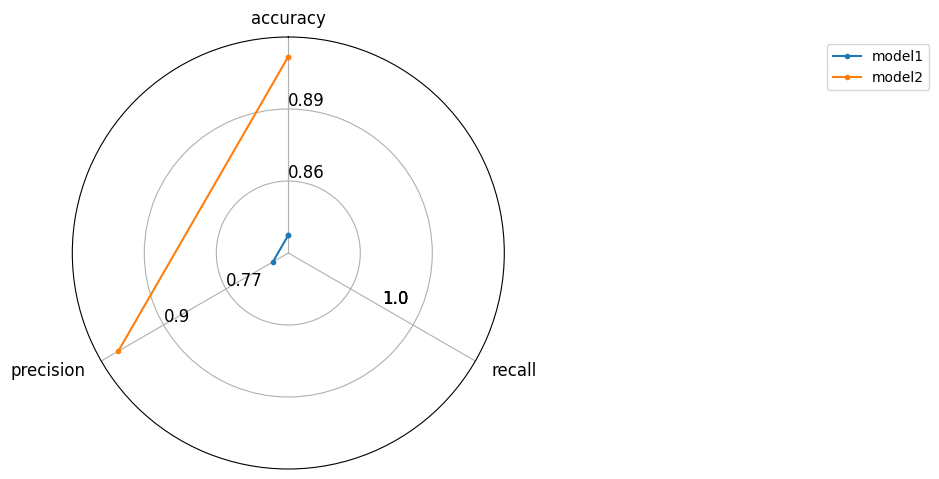

In [31]:
plot = radar_plot(data=data, model_names=model_names)